#**Linear Regression(SGD)**



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [2]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

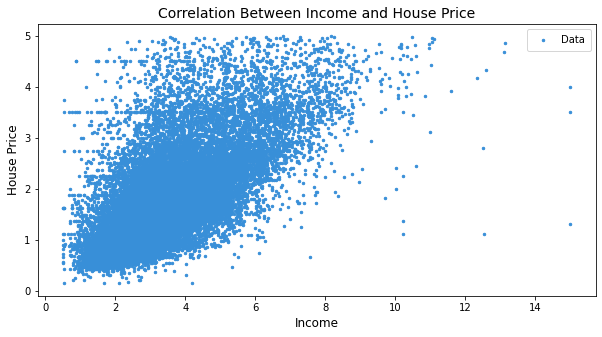

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  m, b = 0.1, 0.1
  mse = [] 
  N = len(X) # number of samples
  for t in range(epochs):
    index = np.arange(0,N)
    np.random.shuffle(index)
    for i in index:
      x_i = X.iloc[i]
      y_i = y.iloc[i]
      f = y_i - (m*x_i + b)
      # Updating m and b
      m -= (lr/(t+1)) * (-2 * x_i * f)
      b -= (lr/(t+1)) * (-2 * f)
    
    mse.append(mean_squared_error(y, (m*X + b)))       

  return m, b, mse

In [0]:
m, b, mse = SGD(X, y, lr=0.0001, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.5486228672530717


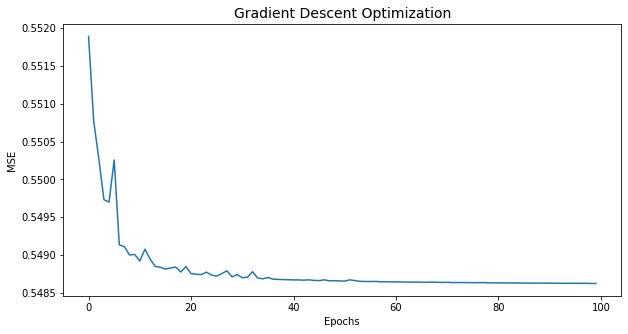

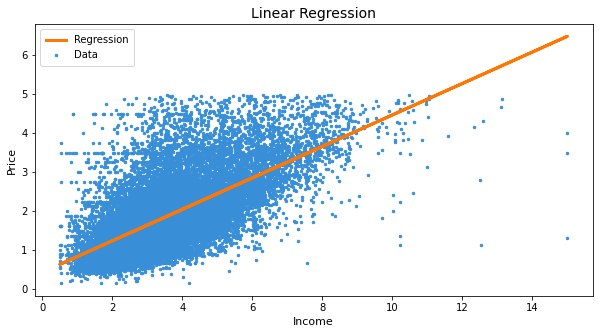

In [9]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
random.seed(5) 

data = [[random.uniform(0,1), random.uniform(0,1)] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



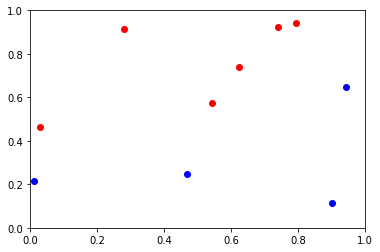

In [12]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(X, Y, epoch, l_rate, C):
  d = X.shape[1]
  n = Y.size
  b = 0
  w = np.zeros((d,))
  W = np.append(b,w)
  for t in range(epoch):
    ypred = np.multiply( (X.dot( w ) + b), Y )
    g = np.zeros((n,))
    g[ypred < 1] = -1
    gradb = C * g.dot( Y )
    gradw = w + C * (X.T * g).dot( Y )
    grad = np.append(gradb,gradw)
    W = W -  (l_rate/(t+1)) * grad
    w = W[1:]
    b = W[0]
  return W



---


**Run SVM Classifier**


---



In [15]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
W = svm_function(X, Y, 200, 1, 20)
print(W)

[-1.86759845 -2.7850335   6.39918074]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



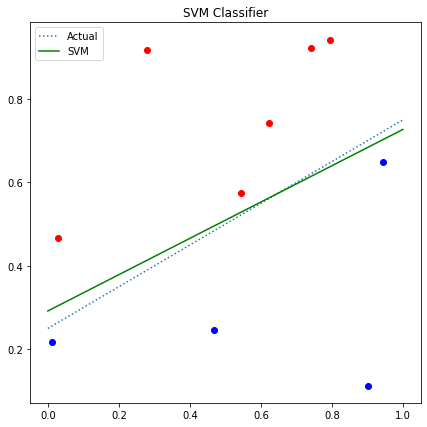

In [16]:
x1 = np.linspace(0, 1, 20)
y1 = 0.5*x1+0.25

y2 = (-W[1] * x1 - W[0])/W[2]

plt.figure(figsize=(7,7))
plt.plot(x1,y1,label = "Actual", ls = ':')
plt.plot(x1,y2,label = 'SVM', c = 'green')
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
plt.legend(loc = 2)
plt.title("SVM Classifier")
plt.show()